## 0. 設定

In [ ]:
# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib for japanese support
import japanize_matplotlib

# functions for data frame display
from IPython.display import display

# Adjust display options
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_columns", None)
plt.rcParams["font.size"]=14
random_seed = 123

## 1. データの読み込み

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip | tail -n 1
!unzip bank.zip | tail -n 1

df_all = pd.read_csv('bank-full.csv', sep=';')

columns = [
    '年齢', '職業', '婚姻', '学歴', '債務不履行', '平均残高',
    '住宅ローン', '個人ローン', '連絡手段', '最終通話日',
    '最終通話月', '最終通話秒数', '通話回数_販促中',
    '前回販促後_経過日数', '通話回数_販促前', '前回販促結果',
    '今回販促結果'
]
df_all.columns = columns

--2021-01-01 17:52:04--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
archive.ics.uci.edu (archive.ics.uci.edu) をDNSに問いあわせています... 128.195.10.252
archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 579043 (565K) [application/x-httpd-php]
`bank.zip' に保存中

bank.zip            100%[===================>] 565.47K   800KB/s    時間 0.7s    

2021-01-01 17:52:05 (800 KB/s) - `bank.zip' へ保存完了 [579043/579043]

replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [9]:
display(df_all.head())

,年齢,職業,婚姻,学歴,債務不履行,平均残高,住宅ローン,個人ローン,連絡手段,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,前回販促結果,今回販促結果
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
display(df_all.head())
print(df_all.shape)
print()

print(df_all['今回販促結果'].value_counts())
rate = df_all['今回販促結果'].value_counts()['yes']/len(df_all)
print(f'営業成功率: {rate:.4f}')
print(df_all.isnull().sum())

,年齢,職業,婚姻,学歴,債務不履行,平均残高,住宅ローン,個人ローン,連絡手段,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,前回販促結果,今回販促結果
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


(45211, 17)

no     39922
yes     5289
Name: 今回販促結果, dtype: int64
営業成功率: 0.1170
年齢            0
職業            0
婚姻            0
学歴            0
債務不履行         0
平均残高          0
住宅ローン         0
個人ローン         0
連絡手段          0
最終通話日         0
最終通話月         0
最終通話秒数        0
通話回数_販促中      0
前回販促後_経過日数    0
通話回数_販促前      0
前回販促結果        0
今回販促結果        0
dtype: int64


## 2. 前処理

In [11]:
def enc(df, column):
    df_dummy = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df.drop([column], axis=1), df_dummy],axis=1)
    return df

df_all2 = df_all.copy()
df_all2 = enc(df_all2, '職業')
df_all2 = enc(df_all2, '婚姻')
df_all2 = enc(df_all2, '学歴')
df_all2 = enc(df_all2, '連絡手段')
df_all2 = enc(df_all2, '前回販促結果')

display(df_all2.head())

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,今回販促結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,学歴_primary,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [12]:
def enc_bin(df, column):
    df[column] = df[column].map(dict(yes=1, no=0))
    return df

df_all2 = enc_bin(df_all2, '債務不履行')
df_all2 = enc_bin(df_all2, '住宅ローン')
df_all2 = enc_bin(df_all2, '個人ローン')
df_all2 = enc_bin(df_all2, '今回販促結果')

display(df_all2.head())

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,今回販促結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,学歴_primary,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [13]:
month_dict = dict(jan=1, feb=2, mar=3, apr=4,
                  may=5, jun=6, jul=7, aug=8,
                  sep=9, oct=10, nov=11, dec=12)

def enc_month(df, column):
    df[column] = df[column].map(month_dict)
    return df

df_all2 = enc_month(df_all2, '最終通話月')
display(df_all2.head())

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,今回販促結果,職業_admin.,職業_blue-collar,職業_entrepreneur,職業_housemaid,職業_management,職業_retired,職業_self-employed,職業_services,職業_student,職業_technician,職業_unemployed,職業_unknown,婚姻_divorced,婚姻_married,婚姻_single,学歴_primary,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


## 3. データ分割とアルゴリズムの選択

In [16]:
x = df_all2.drop('今回販促結果', axis=1)
y = df_all2['今回販促結果'].values

test_size = 0.4

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=random_seed,
    stratify=y)

from sklearn.linear_model import LogisticRegression
algorithm1 = LogisticRegression(random_state=random_seed)

from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier(random_state=random_seed)

from sklearn.ensemble import RandomForestClassifier
algorithm3 = RandomForestClassifier(random_state=random_seed)

from xgboost import XGBClassifier
algorithm4 = XGBClassifier(random_state=random_seed)

algorithms = [algorithm1, algorithm2, algorithm3, algorithm4]

from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    scores = cross_val_score(algorithm, x_train, y_train,
                             cv=stratifiedkfold, scoring='roc_auc')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均スコア: {score:.4f}  個別スコア: {scores}  {name}')

平均スコア: 0.8326  個別スコア: [0.8279 0.8287 0.8412]  LogisticRegression
平均スコア: 0.6958  個別スコア: [0.6917 0.7023 0.6935]  DecisionTreeClassifier
平均スコア: 0.9200  個別スコア: [0.9259 0.9196 0.9145]  RandomForestClassifier
[17:58:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:58:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
平均スコア: 0.9256  個別スコア: [0.9263 0.9272 0.92

## 4. 評価

In [17]:
def make_cm(matrix, columns):
    n = len(columns)
    act = ['正解データ'] * n
    pred = ['予測結果'] * n

    cm = pd.DataFrame(matrix, columns=[pred, columns], index=[act, columns])
    return cm

# アルゴリズム選定
# XGBoostを利用
algorithm = XGBClassifier(random_state=random_seed)

# 学習
algorithm.fit(x_train, y_train)

# 予測
y_pred = algorithm.predict(x_test)

# 評価
# 混同行列を出力
from sklearn.metrics import confusion_matrix
df_matrix = make_cm(
    confusion_matrix(y_test, y_pred), ['失敗', '成功'])
display(df_matrix)

# 適合率, 再現率, F値を計算
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary')
print(f'適合率: {precision:.4f}  再現率: {recall:.4f}  F値: {fscore:.4f}')

[18:00:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


予測結果      
             失敗    成功
正解データ 失敗  15371   598
      成功   1102  1014

適合率: 0.6290  再現率: 0.4792  F値: 0.5440


## 5. チューニング

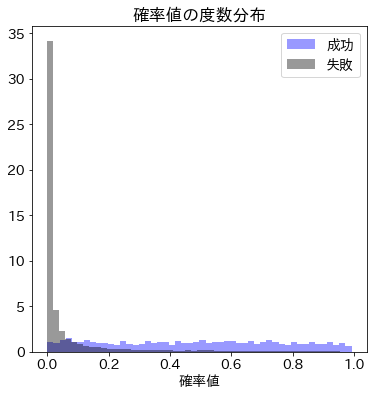

In [18]:
# 確率値の度数分布グラフ
import seaborn as sns

# y=0の確率値取得
y_proba0 = algorithm.predict_proba(x_test)[:,1]

# y_test=0 と y_test=1 でデータ分割
y0 = y_proba0[y_test==0]
y1 = y_proba0[y_test==1]

# 散布図描画
plt.figure(figsize=(6,6))
plt.title('確率値の度数分布')
sns.distplot(y1, kde=False, norm_hist=True,
    bins=50, color='b', label='成功')
sns.distplot(y0, kde=False, norm_hist=True,
    bins=50, color='k', label='失敗')
plt.xlabel('確率値')
plt.legend()
plt.show()

In [19]:
# 閾値を変更した場合の予測関数の定義
def pred(algorithm, x, thres):
    # 確率値の取得(行列)
    y_proba = algorithm.predict_proba(x)
    
    # 予測結果1の確率値
    y_proba1 =  y_proba[:,1]
    
    # 予測結果1の確率値 > 閾値
    y_pred = (y_proba1 > thres).astype(int)
    return y_pred

# 閾値を0.05刻みに変化させて、適合率, 再現率, F値を計算する
thres_list = np.arange(0.5, 0, -0.05)

for thres in thres_list:
    y_pred = pred(algorithm, x_test, thres)
    pred_sum =  y_pred.sum()
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_test, y_pred, average='binary')
    print(f'閾値: {thres:.2f} 陽性予測数: {pred_sum}\
 適合率: {precision:.4f} 再現率: {recall:.4f}  F値: {fscore:.4f})')

閾値: 0.50 陽性予測数: 1612 適合率: 0.6290 再現率: 0.4792  F値: 0.5440)
閾値: 0.45 陽性予測数: 1839 適合率: 0.6117 再現率: 0.5317  F値: 0.5689)
閾値: 0.40 陽性予測数: 2041 適合率: 0.6022 再現率: 0.5808  F値: 0.5913)
閾値: 0.35 陽性予測数: 2304 適合率: 0.5820 再現率: 0.6337  F値: 0.6068)
閾値: 0.30 陽性予測数: 2544 適合率: 0.5688 再現率: 0.6838  F値: 0.6210)
閾値: 0.25 陽性予測数: 2831 適合率: 0.5440 再現率: 0.7278  F値: 0.6226)
閾値: 0.20 陽性予測数: 3184 適合率: 0.5135 再現率: 0.7727  F値: 0.6170)
閾値: 0.15 陽性予測数: 3616 適合率: 0.4806 再現率: 0.8214  F値: 0.6064)
閾値: 0.10 陽性予測数: 4277 適合率: 0.4361 再現率: 0.8814  F値: 0.5835)
閾値: 0.05 陽性予測数: 5519 適合率: 0.3629 再現率: 0.9466  F値: 0.5247)


In [20]:
# F値を最大にする閾値は0.30
y_final = pred(algorithm, x_test, 0.30)

# 混同行列を出力
df_matrix2 = make_cm(
    confusion_matrix(y_test, y_final), ['失敗', '成功'])
display(df_matrix2)

# 適合率, 再現率, F値を計算
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, y_final, average='binary')
print(f'適合率: {precision:.4f}  再現率: {recall:.4f}\
  F値: {fscore:.4f}')

予測結果      
             失敗    成功
正解データ 失敗  14872  1097
      成功    669  1447

適合率: 0.5688  再現率: 0.6838  F値: 0.6210


## 6. 重要度分析

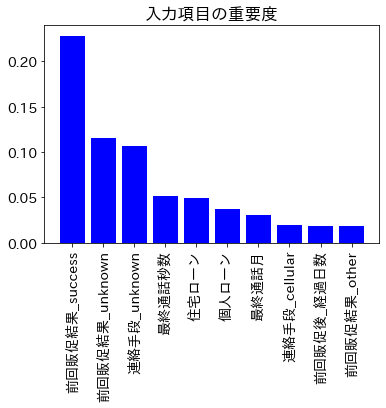

In [21]:
# 重要度ベクトルの取得
importances = algorithm.feature_importances_

# 項目名をキーにSeriesを生成
w = pd.Series(importances, index=x.columns)

# 値の大きい順にソート
u = w.sort_values(ascending=False)

# top10のみ抽出
v = u[:10]

# 重要度の棒グラフ表示
plt.title('入力項目の重要度')
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)), v.index, rotation=90)
plt.show()

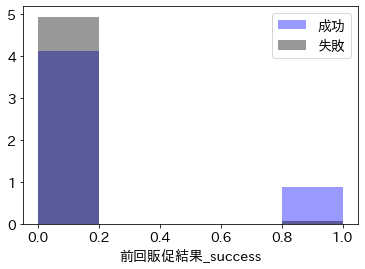

In [22]:
column = '前回販促結果_success'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='成功')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='失敗')

plt.legend()
plt.show()

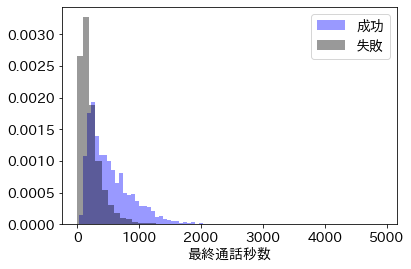

In [23]:
column = '最終通話秒数'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
             bins=50, color='b', label='成功')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=50, color='k', label='失敗')

plt.legend()
plt.show()

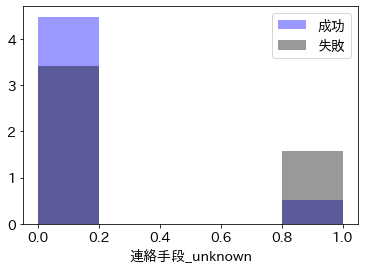

In [24]:
column = '連絡手段_unknown'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='成功')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='失敗')

plt.legend()
plt.show()

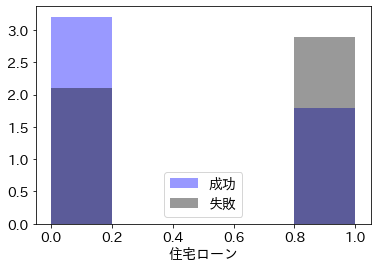

In [25]:
column = '住宅ローン'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='成功')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='失敗')

plt.legend()
plt.show()

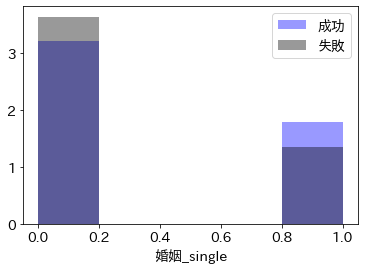

In [26]:
column = '婚姻_single'

sns.distplot(x_test[y_test==1][column], kde=False, norm_hist=True,
            bins=5,color='b', label='成功')
sns.distplot(x_test[y_test==0][column], kde=False, norm_hist=True,
             bins=5,color='k', label='失敗')

plt.legend()
plt.show()